In [ ]:
!pip install datasets

from datasets import load_dataset

dataset = load_dataset("garythung/trashnet")

# Assistant
This error occurs because the `pyarrow` library is not installed or there is a version mismatch causing this attribute error.

To fix this error, you can try upgrading the `pyarrow` library to the latest version using the following command:


After upgrading the `pyarrow` library, you can try running the code again to see if the issue is resolved.

Would you like me to provide the corrected code?

In [7]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5054
    })
})


In [8]:
# Check the available splits
print(dataset.keys())

# Access the training split
train_dataset = dataset['train']

# Display the first example in the training split
print(train_dataset[0])


dict_keys(['train'])
{'image': <PIL.Image.Image image mode=RGB size=3024x4032 at 0x7A50444D8CD0>, 'label': 0}


In [9]:
for i in range(5):
  print(train_dataset[0])

{'image': <PIL.Image.Image image mode=RGB size=3024x4032 at 0x7A5054588520>, 'label': 0}
{'image': <PIL.Image.Image image mode=RGB size=3024x4032 at 0x7A504408FA00>, 'label': 0}
{'image': <PIL.Image.Image image mode=RGB size=3024x4032 at 0x7A5054651BD0>, 'label': 0}
{'image': <PIL.Image.Image image mode=RGB size=3024x4032 at 0x7A50442A5390>, 'label': 0}
{'image': <PIL.Image.Image image mode=RGB size=3024x4032 at 0x7A5044698700>, 'label': 0}


In [10]:
import os

# Create a directory to save the dataset
os.makedirs("trashnet_dataset", exist_ok=True)

# Save the training split to a CSV file
train_dataset.to_csv("trashnet_dataset/train.csv", index=False)

# Check the saved files
os.listdir("trashnet_dataset")


Creating CSV from Arrow format:   0%|          | 0/6 [00:00<?, ?ba/s]

['all', 'train.csv']

In [11]:
import random
import shutil

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets

  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

  Returns:
    None
  """

  #items = os.listdir(SOURCE_DIR)
  print(len(items))

  #Splitting the dataset
  split_index = int(len(items) *SPLIT_SIZE)
  random.shuffle(items)

  classes = os.listdir(SOURCE_DIR)
  for class_name in classes:
      class_source_dir = os.path.join(SOURCE_DIR, class_name)
      class_training_dir = os.path.join(TRAINING_DIR, class_name)
      class_validation_dir = os.path.join(VALIDATION_DIR, class_name)

      class_items = os.listdir(class_source_dir)
      split_index = int(len(class_items) * SPLIT_SIZE)
      random.shuffle(class_items)

      for i in range(len(class_items)):
          source_path = os.path.join(class_source_dir, class_items[i])
          if i < split_index:
              destination_path = os.path.join(class_training_dir, class_items[i])
          else:
              destination_path = os.path.join(class_validation_dir, class_items[i])

          shutil.copy(source_path, destination_path)


'''
  for i in range(len(items)):
    if i < split_index:
      shutil.copy(os.path.join(SOURCE_DIR, items[i]), TRAINING_DIR)
    else:
      shutil.copy(os.path.join(SOURCE_DIR, items[i]), VALIDATION_DIR)
'''

'\n  for i in range(len(items)):\n    if i < split_index:\n      shutil.copy(os.path.join(SOURCE_DIR, items[i]), TRAINING_DIR)\n    else:\n      shutil.copy(os.path.join(SOURCE_DIR, items[i]), VALIDATION_DIR)\n'

In [12]:
import os
from PIL import Image
import numpy as np

# Create the base directory for all images
os.makedirs("trashnet_dataset/all", exist_ok=True)

# Get the class names from the dataset
classes = train_dataset.features['label'].names

# Create directories for each class within the 'all' directory
for class_name in classes:
    os.makedirs(os.path.join("trashnet_dataset/all", class_name), exist_ok=True)

# Save images into respective class directories
for idx, example in enumerate(train_dataset):
    image = Image.fromarray(np.array(example['image']))
    label = example['label']
    class_name = classes[label]
    image.save(f"trashnet_dataset/all/{class_name}/{idx}.jpg")


In [13]:
SOURCE_DIR = "trashnet_dataset/all"
TRAINING_DIR = "trashnet_dataset/train"
VALIDATION_DIR = "trashnet_dataset/validation"

In [14]:
import random
import shutil

def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
    """
    Splits the data into train and test sets

    Args:
        SOURCE_DIR (string): directory path containing the images
        TRAINING_DIR (string): directory path to be used for training
        VALIDATION_DIR (string): directory path to be used for validation
        SPLIT_SIZE (float): proportion of the dataset to be used for training

    Returns:
        None
    """

    classes = os.listdir(SOURCE_DIR)
    for class_name in classes:
        class_source_dir = os.path.join(SOURCE_DIR, class_name)
        class_training_dir = os.path.join(TRAINING_DIR, class_name)
        class_validation_dir = os.path.join(VALIDATION_DIR, class_name)

        os.makedirs(class_training_dir, exist_ok=True)
        os.makedirs(class_validation_dir, exist_ok=True)

        class_items = os.listdir(class_source_dir)
        split_index = int(len(class_items) * SPLIT_SIZE)
        random.shuffle(class_items)

        for i in range(len(class_items)):
            source_path = os.path.join(class_source_dir, class_items[i])
            if i < split_index:
                destination_path = os.path.join(class_training_dir, class_items[i])
            else:
                destination_path = os.path.join(class_validation_dir, class_items[i])

            shutil.copy(source_path, destination_path)

# Call the function to split the data
split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE=0.8)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "trashnet_dataset/train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "trashnet_dataset/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 4041 images belonging to 6 classes.
Found 1013 images belonging to 6 classes.


In [16]:
print('Process good so far!')

Process good so far!


In [22]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model pre-trained on ImageNet, without the top fully connected layers
base_model = VGG16(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [23]:
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 177s 4s/step - accuracy: 0.2371 - loss: 2.1593 - val_accuracy: 0.2754 - val_loss: 3.9274
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - accuracy: 0.3825 - loss: 1.6479 - val_accuracy: 0.3633 - val_loss: 4.3240
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.4798 - loss: 1.4344 - val_accuracy: 0.4501 - val_loss: 3.7218
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - accuracy: 0.5058 - loss: 1.3214 - val_accuracy: 0.5400 - val_loss: 5.3266
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.5349 - loss: 1.2600 - val_accuracy: 0.5903 - val_loss: 5.8540
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.5680 - loss: 1.1891 - val_accuracy: 0.6150 - val_loss: 17.2201
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 152s 4s/step - accuracy: 0.5900 - loss: 1.1255 - val_accuracy: 0.6486 - val_loss: 10.3343
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.5879 - loss: 1.1324 - val_accuracy: 0.6713 -

In [25]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.6947 - loss: 0.8031 - val_accuracy: 0.7581 - val_loss: 45.9612
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.7210 - loss: 0.7385 - val_accuracy: 0.7522 - val_loss: 53.4286
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 150s 4s/step - accuracy: 0.7006 - loss: 0.8265 - val_accuracy: 0.7542 - val_loss: 40.9210
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.6963 - loss: 0.8093 - val_accuracy: 0.7611 - val_loss: 68.5957
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.7203 - loss: 0.7870 - val_accuracy: 0.7621 - val_loss: 28.2291
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - accuracy: 0.7172 - loss: 0.7634 - val_accuracy: 0.7621 - val_loss: 43.6123
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - accuracy: 0.7146 - loss: 0.7737 - val_accuracy: 0.7621 - val_loss: 38.6643
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.7129 - loss: 0.7708 - val_accuracy: 0.7

In [26]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 171s 4s/step - accuracy: 0.7176 - loss: 0.7516 - val_accuracy: 0.7651 - val_loss: 52.2905
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - accuracy: 0.7251 - loss: 0.7307 - val_accuracy: 0.7700 - val_loss: 34.4135
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.7127 - loss: 0.7582 - val_accuracy: 0.7641 - val_loss: 49.1435
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 181s 5s/step - accuracy: 0.7208 - loss: 0.7394 - val_accuracy: 0.7611 - val_loss: 50.4507
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - accuracy: 0.7426 - loss: 0.7301 - val_accuracy: 0.7690 - val_loss: 62.5078
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.7332 - loss: 0.7182 - val_accuracy: 0.7739 - val_loss: 49.6888
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.7502 - loss: 0.6811 - val_accuracy: 0.7720 - val_loss: 77.4511
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 161s 4s/step - accuracy: 0.7405 - loss: 0.7149 - val_accuracy: 0.7

<function matplotlib.pyplot.show(close=None, block=None)>

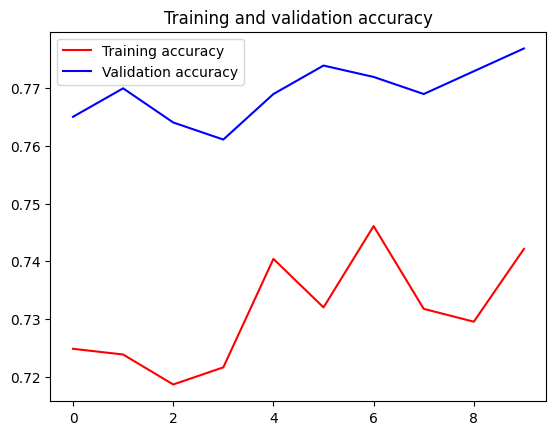

<Figure size 640x480 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt

# Plotting the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show

In [33]:
model.save('/kaggle/working/my_model.h5')